
Perform analysis on the transferability score 


In [1]:
import matplotlib.pyplot as plt
from math import log, sqrt
import os
import pandas as pd
from statistics import median

In [2]:
"""
Color map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score

Wasserstein distance is calculated as the final step error from Sinkhorn OT
"""


'\nColor map of 1/Wasserstein distance vs. 1/transferability score vs. f1 score\n\nWasserstein distance is calculated as the final step error from Sinkhorn OT\n'

In [3]:
output_dir = os.path.join(os.path.expanduser("~"), f"deep_patient/outputs/mimic")
print(f"Will save outputs to {output_dir}")
summary_path = os.path.join(output_dir, "selected_summary_mimic.csv")
summary_df = pd.read_csv(summary_path, header=0, index_col=0)
label_codes = list(summary_df.index)


Will save outputs to /home/wanxinli/deep_patient/outputs/mimic


In [4]:
""" 
Read each label score file
"""

stat_df = pd.DataFrame(columns=['label_code','trans_target_f1', 'target_f1', 'delta_f1', 'trans_target_accuracy', 'delta_accuracy', 'div_score', 'w_dist', 'log_w_dist'])
stat_df = stat_df.set_index('label_code')

for code in label_codes:
    code_path = os.path.join(output_dir, "exp3_"+code+"_score.csv")
    code_df = pd.read_csv(code_path, header=0, index_col=0)
    stat_df.at[code, 'div_score'] = median(list(code_df['transfer_score']))
    stat_df.at[code, 'inverse_div_score'] = 1/stat_df.at[code, 'div_score']
    stat_df.at[code, 'w_dist'] = median(list(code_df['w_dist']))
    stat_df.at[code, 'sqrt_w_dist'] = sqrt(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'log_w_dist'] = log(stat_df.at[code, 'w_dist'])
    stat_df.at[code, 'inverse_log_w_dist'] = 1/stat_df.at[code, 'log_w_dist']
    stat_df.at[code, 'trans_target_f1'] = median(list(code_df['trans_source_f1']))
    stat_df.at[code, 'delta_f1'] = stat_df.at[code, 'trans_target_f1'] - median(list(code_df['source_f1']))
    stat_df.at[code, 'trans_target_accuracy'] = median(list(code_df['trans_source_accuracy']))
    stat_df.at[code, 'delta_accuracy'] = stat_df.at[code, 'trans_target_accuracy'] - median(list(code_df['source_accuracy']))



In [5]:
stat_df

,trans_target_f1,target_f1,delta_f1,trans_target_accuracy,delta_accuracy,div_score,w_dist,log_w_dist,inverse_div_score,sqrt_w_dist,inverse_log_w_dist
label_code,,,,,,,,,,,
008.45,0.628857,NaN,0.024567,0.635,0.01,113.460863,0.0,-18.540067,0.008814,0.000094,-0.053937
041.11,0.605594,NaN,0.032704,0.61,0.035,149.2946,0.0,-18.52252,0.006698,0.000095,-0.053988
042,0.531286,NaN,0.031296,0.5325,0.025,165.461945,0.0,-18.549108,0.006044,0.000094,-0.053911
038.11,0.663239,NaN,-0.013764,0.67,-0.02,120.518726,0.0,-18.509121,0.008297,0.000096,-0.054027
038.9,0.714993,NaN,-0.020361,0.725,-0.02,99.834247,0.0,-18.513006,0.010017,0.000095,-0.054016
...,...,...,...,...,...,...,...,...,...,...,...
E878.0,0.658232,NaN,0.030582,0.6625,0.0225,147.078537,0.0,-18.511714,0.006799,0.000096,-0.054020
E878.1,0.599492,NaN,0.033265,0.61,0.025,131.696641,0.0,-18.528312,0.007593,0.000095,-0.053971
E878.2,0.63,NaN,0.025833,0.635,0.015,126.932743,0.0,-18.541142,0.007878,0.000094,-0.053934


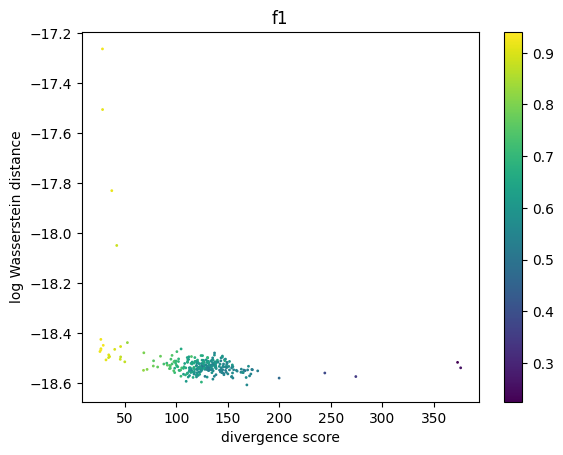

In [20]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
plt.title('f1')
plt.colorbar()
plt.show()

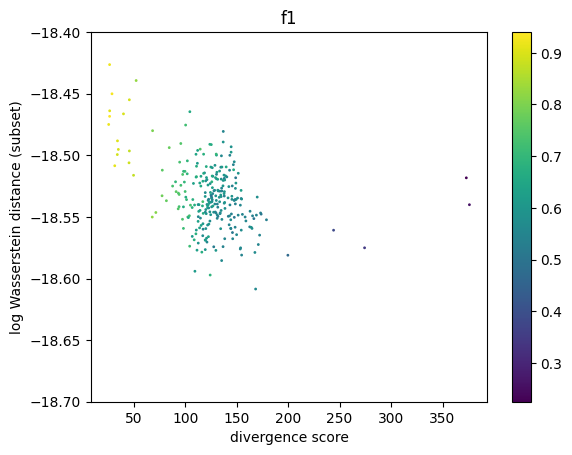

In [8]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance (subset)')
plt.ylim(-18.7, -18.4)
plt.title('f1')
plt.colorbar()
# fig_path = os.path.join(output_dir, "exp3_w_dist.pdf")
# plt.savefig(fig_path)
plt.show()

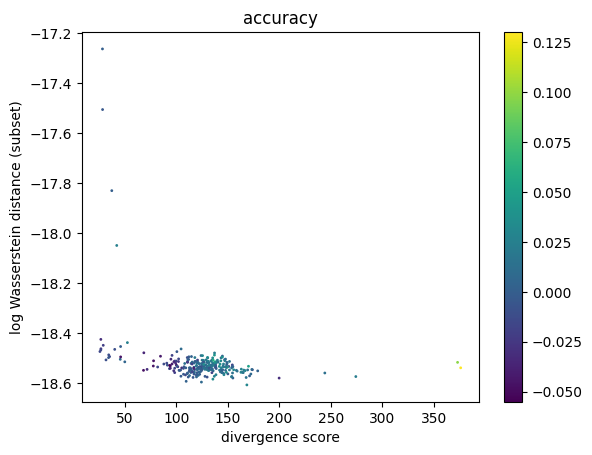

In [11]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['delta_accuracy']), cmap=plt.cm.viridis)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance (subset)')
# plt.ylim(-18.7, -18.4)
plt.title('accuracy')
plt.colorbar()
plt.show()

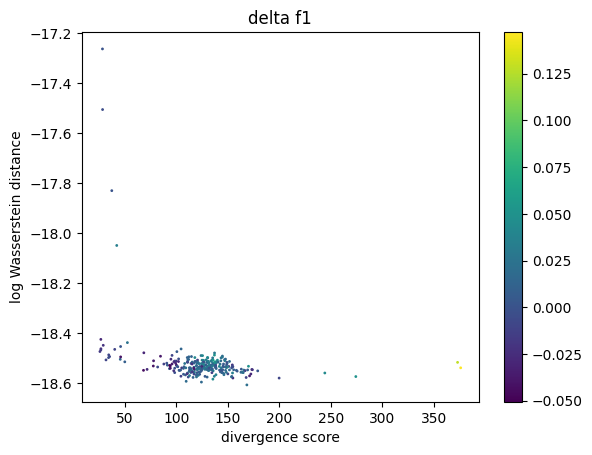

In [28]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.viridis)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance')
plt.title('delta f1')
plt.colorbar()
plt.show()

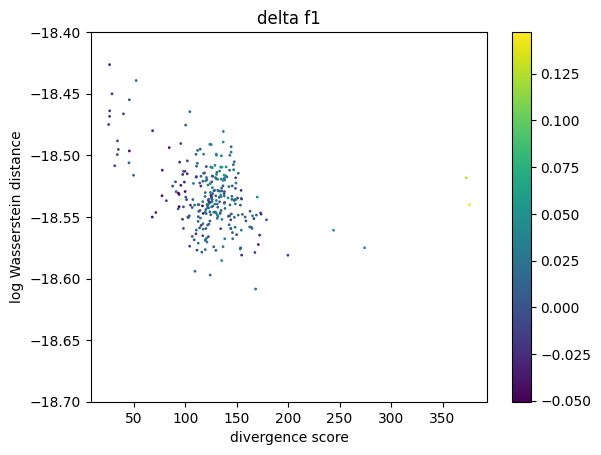

In [29]:
plt.figure()
plt.scatter(list(stat_df['div_score']), list(stat_df['log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.viridis)
plt.xlabel('divergence score')
plt.ylabel('log Wasserstein distance (range)')
plt.ylim(-18.7, -18.4)
plt.title('delta f1')
plt.colorbar()
plt.show()

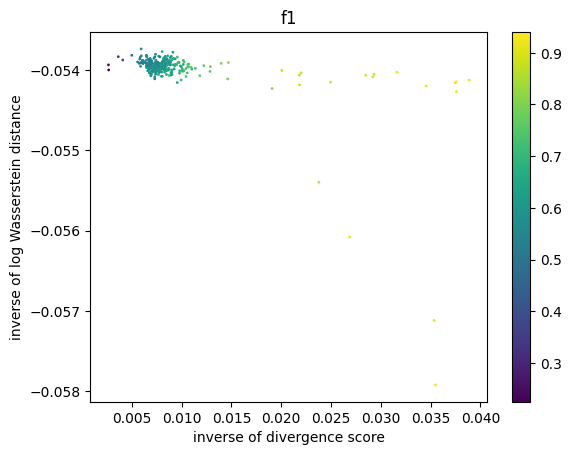

In [33]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance')
plt.title('f1')
plt.colorbar()
plt.show()


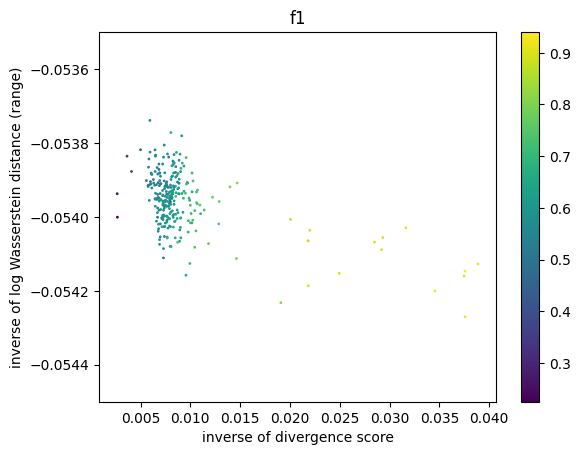

In [10]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['trans_target_f1']), cmap=plt.cm.viridis)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance (range)')
plt.ylim(-0.0545, -0.0535)
plt.title('f1')
plt.colorbar()
fig_path = os.path.join(output_dir, "exp3_w_dist.pdf")
plt.savefig(fig_path, bbox_inches = 'tight')
plt.show()


In [50]:

# plt.scatter(list(stat_df['log_w_dist']), list(stat_df['delta_f1']), s=1)
# plt.xlabel('log Wasserstein distance')
# plt.ylabel('f1')
# plt.show()

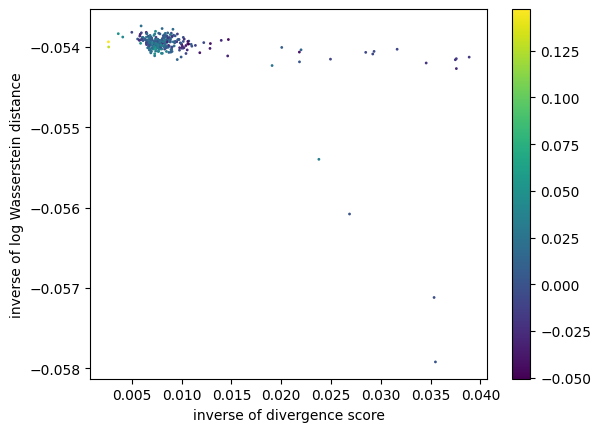

In [51]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.viridis)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance')
plt.colorbar()
# plt.ylim(-18.7, -18.4)
plt.show()


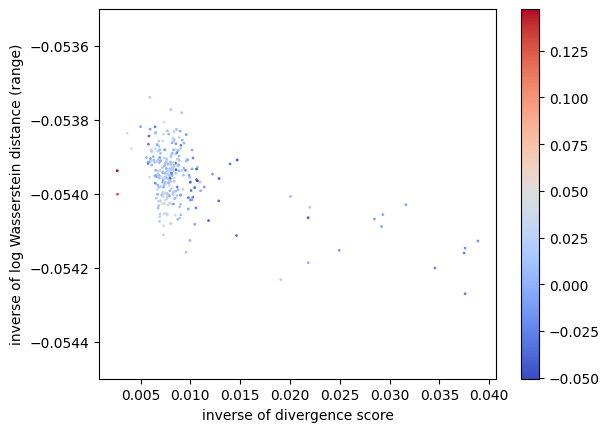

In [52]:
plt.figure()
plt.scatter(list(stat_df['inverse_div_score']), list(stat_df['inverse_log_w_dist']), s=1, c=list(stat_df['delta_f1']), cmap=plt.cm.coolwarm)
plt.xlabel('inverse of divergence score')
plt.ylabel('inverse of log Wasserstein distance (range)')
plt.ylim(-0.0545, -0.0535)
plt.colorbar()
plt.show()

